<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise4_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset with brain atlas A for classification tasks: for the first set of 5 small programming tasks use the Oasis dataset provided by the nilearn package, which can be downloaded using the code below. This is a dataset of structural brain scans (aka voxel-based morphometry) for male and female individuals.

Task 1 - Use sklearn.linear_model.LogisticRegression(penalty=’l1’, C=1.0),
sklearn.linear_model.LogisticRegression(penalty=’l2’, C=1.0) and sklearn.linear_model.LogisticRegression(penalty=’elasticnet’, l1_ratio=0.5, C=1.0) to fit separate logistic predictive models based on 100, 200, 300, ..., 900, 1000 brain regions of interest (see ‘n_rois’ argument for datasets. fetch_atlas_schaefer_2018) based on the first 80% of the 100 structural brain scans to predict sex. Next, evaluate each fitted LogReg model on the unseen final 20% of the 100 structural brain scans and retrieve classification accuracy in XX.YY%. Please plot the classification accuracy on the test set (x
axis=the different atlas resolutions, y axis=prediction accuracy on test set, 3 lines with 3 colors for the 3 prediction model classes with different regularization constraints).

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=200)
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True,
memory='nilearn_cache')
input_variables =masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F',
dtype=int) #gives 1 for females and 0 for males

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# We prepare the models in advance
lasso = LogisticRegression(max_iter=1e4, penalty = 'l1', C = 1, solver = 'saga').fit
ridge = LogisticRegression(max_iter=1e4, penalty = 'l2', C = 1, solver = 'saga').fit
e_net = LogisticRegression(max_iter=1e4, penalty = 'elasticnet', l1_ratio=0.5, C = 1, solver = 'saga').fit

In [ ]:
# We rename and scale the X and y variables
X, y = input_variables, output_variable
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# We fit the lasso training model 
LassoReg = lasso(X_train,y_train) # We fit the lasso model
score = LassoReg.score(X_train, y_train)
score = np.multiply(score, 100) 
print('Lasso training accuracy: %.2f' % ((score))) # We print the classification accuracy

# We fit the ridge training model 
RidgeReg = ridge(X_train,y_train) # We fit the ridge model
score = RidgeReg.score(X_train, y_train)
score = np.multiply(score, 100) 
print('Ridge training accuracy: %.2f' % ((score))) # We print the classification accuracy

# We fit the ElasticNet training model 
E_netReg = e_net(X_train,y_train) # We fit the elnet model
score = E_netReg.score(X_train, y_train)
score = np.multiply(score, 100) 
print('ElasticNet training accuracy: %.2f' % ((score))) # We print the classification accuracy

Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00


In [ ]:
# We are now ready to run our predictions on the test set
yhat_L = LassoReg.predict(X_test) # We define the lasso model and store its prediction as "yhat"
score_L = LassoReg.score(X_test, y_test) # We store the scores
score_L = np.multiply(score_L, 100) 
print('Lasso test accuracy: %.2f' % ((score_L))) # We print the scores

yhat_R = RidgeReg.predict(X_test) # We define the ridge model and store its prediction as "yhat"
score_R = RidgeReg.score(X_test, y_test) # We store the scores
score_R = np.multiply(score_R, 100) 
print('Ridge test accuracy: %.2f' % ((score_R))) # We print the scores

yhat_E = E_netReg.predict(X_test) # We define the elnet model and store its prediction as "yhat"
score_E = E_netReg.score(X_test, y_test) # We store the scores
score_E = np.multiply(score_E, 100) 
print('ElasticNet test accuracy: %.2f' % ((score_E))) # We print the scores

Lasso test accuracy: 90.00
Ridge test accuracy: 85.00
ElasticNet test accuracy: 85.00


Looks like the lasso model is slightly better than the other two at predicting sex. Now that we have tested our code, we're ready to iterate:

In [ ]:
# We define the iterating variable
ROIs = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [ ]:
# We pre-allocate the variables we want to populate with accuracy scores
lasso_tr_acc = []
ridge_tr_acc = []
elnet_tr_acc = []

lasso_test_acc = []
ridge_test_acc = []
elnet_test_acc = []

In [ ]:
for x in ROIs:
    brain_data = datasets.fetch_oasis_vbm(n_subjects=100) 
    yeo = datasets.fetch_atlas_schaefer_2018(n_rois=(x))  # We iterate through the list of ROI values
    masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache') 
    input_variables = masker.fit_transform(brain_data.gray_matter_maps) 
    output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=np.int)

    lasso = LogisticRegression(max_iter=1e4, penalty = 'l1', C = 1, solver = 'saga').fit
    ridge = LogisticRegression(max_iter=1e4, penalty = 'l2', C = 1, solver = 'saga').fit
    e_net = LogisticRegression(max_iter=1e4, penalty = 'elasticnet', l1_ratio=0.5, C = 1, solver = 'saga').fit

    X, y = input_variables, output_variable
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    LassoReg = lasso(X_train,y_train) # We fit the lasso training model
    score_L = LassoReg.score(X_train, y_train)
    score_L = np.multiply(score_L, 100)
    lasso_tr_acc.append(score_L) 
    print('Lasso training accuracy: %.2f' % ((score_L))) # We print the scores

    RidgeReg = ridge(X_train,y_train) # We fit the ridge training model
    score_R = RidgeReg.score(X_train, y_train)
    score_R = np.multiply(score_R, 100) 
    ridge_tr_acc.append(score_R) 
    print('Ridge training accuracy: %.2f' % ((score_R))) # We print the scores

    E_netReg = e_net(X_train,y_train) # We fit the ElasticNet training model
    score_E = E_netReg.score(X_train, y_train)
    score_E = np.multiply(score_E, 100) 
    elnet_tr_acc.append(score_E) 
    print('ElasticNet training accuracy: %.2f' % ((score_E))) # We print the scores

    yhat_L = LassoReg.predict(X_test) # We define the lasso model and store its prediction as "yhat"
    score_Lt = LassoReg.score(X_test, y_test) # We store the scores
    score_Lt = np.multiply(score_Lt, 100) 
    lasso_test_acc.append(score_Lt)
    print('Lasso test accuracy: %.2f' % ((score_Lt))) # We print the scores

    yhat_R = RidgeReg.predict(X_test) # We define the ridge model and store its prediction as "yhat"
    score_Rt = RidgeReg.score(X_test, y_test) # We store the scores
    score_Rt = np.multiply(score_Rt, 100) 
    ridge_test_acc.append(score_Rt)
    print('Ridge test accuracy: %.2f' % ((score_Rt))) # We print the scores

    yhat_E = E_netReg.predict(X_test) # We define the elnet model and store its prediction as "yhat"
    score_Et = E_netReg.score(X_test, y_test) # We store the scores
    score_Et = np.multiply(score_Et, 100) 
    elnet_test_acc.append(score_Et)
    print('ElasticNet test accuracy: %.2f' % ((score_Et))) # We print the scores

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 96.25
Ridge training accuracy: 100.00
ElasticNet training accuracy: 97.50
Lasso test accuracy: 60.00
Ridge test accuracy: 55.00
ElasticNet test accuracy: 70.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00
Lasso test accuracy: 70.00
Ridge test accuracy: 70.00
ElasticNet test accuracy: 70.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00
Lasso test accuracy: 90.00
Ridge test accuracy: 85.00
ElasticNet test accuracy: 85.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00
Lasso test accuracy: 95.00
Ridge test accuracy: 85.00
ElasticNet test accuracy: 85.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00
Lasso test accuracy: 75.00
Ridge test accuracy: 80.00
ElasticNet test accuracy: 80.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00
Lasso test accuracy: 75.00
Ridge test accuracy: 80.00
ElasticNet test accuracy: 75.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00
Lasso test accuracy: 75.00
Ridge test accuracy: 80.00
ElasticNet test accuracy: 80.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00
Lasso test accuracy: 75.00
Ridge test accuracy: 85.00
ElasticNet test accuracy: 90.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00
Lasso test accuracy: 75.00
Ridge test accuracy: 75.00
ElasticNet test accuracy: 80.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 100.00
Ridge training accuracy: 100.00
ElasticNet training accuracy: 100.00
Lasso test accuracy: 80.00
Ridge test accuracy: 70.00
ElasticNet test accuracy: 80.00


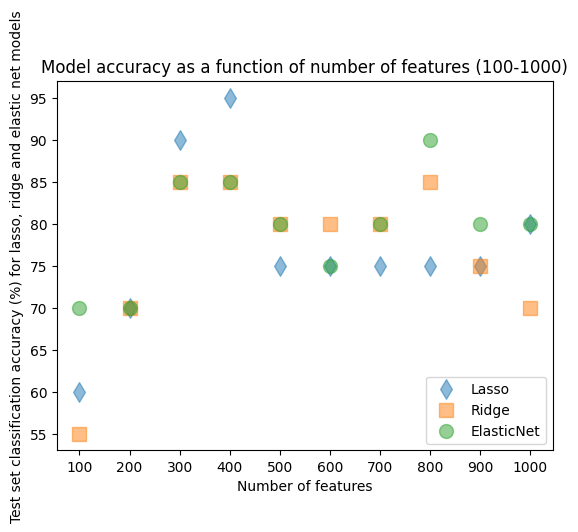

In [ ]:
# We're ready to plot
lab = ['Lasso', 'Ridge', 'ElasticNet']
plt.style.use("default")
plt.scatter(ROIs,lasso_test_acc, s=100, alpha = 0.5, marker = 'd')
plt.scatter(ROIs,ridge_test_acc, s=100, alpha = 0.5, marker = 's')
plt.scatter(ROIs,elnet_test_acc, s=100, alpha = 0.5, marker = 'o')
plt.legend(labels=(lab))
plt.gca().set(
    title="Model accuracy as a function of number of features (100-1000)",
    xlabel="Number of features",
    ylabel="Test set classification accuracy (%) for lasso, ridge and elastic net models",
    xticks = (ROIs)
)
plt.show()

The lasso model benefits from having 400 ROIs the most, yielding a great test set classification accuracy of 95%. Conversely, when nrois is set to 800, we get test set classification accuracies of 90% and 85% for the ElasticNet and Ridge models respectively.